# NOTE that Optitype is fast, but it is also doing less - only typing HLA-I

In [1]:
import os
from os import walk

import pandas as pd
import numpy as np
import sys
import re

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_rows', 9000)
pd.set_option('display.max_columns', 1500)
pd.set_option('max_colwidth', 400)

In [2]:
resultpath = 'C:\\Users\\nikol\\OneDrive\\DTU\\11_semester\\output_full_dataset\\'

#Load performance files:
memory_use_gb_dict = dict()
cpu_time_min_dict = dict()
wall_time_min_dict = dict()


for tool in ['kourami', 'hla-la', 'optitype', 'hisatgenotype', 'stc-seq']:
    full_filepath =  resultpath + tool
    
    #Make list of results for each tool:
    memory_use_gb_dict[tool] = list()
    cpu_time_min_dict[tool] = list()
    wall_time_min_dict[tool] = list()
    
    #Reset list of filenames for each tool
    tool_files = list()

    for (dirpath, dirnames, filenames) in walk(full_filepath):
        tool_files.extend(filenames)
    
    for file in tool_files:
        #Only include logfiles
        if file.endswith('.log'):
            with open(full_filepath + '\\' + file, 'r') as infile:
                for line in infile:
                    #Grab memory use
                    if line.startswith('    resources_used.mem'):
                        line_extract = line.split()[-1][:-2]
                        
                        memory_gb = int(line_extract)/(10**6)
                        
                        memory_use_gb_dict[tool].append(memory_gb)
                    
                    #Grab cputime 
                    if line.startswith('    resources_used.cput'):
                        line_extract = line.split()[-1]
                        
                        time_min = (int(line_extract[-8:-6]) * 60) + int(line_extract[-5:-3]) + (int(line_extract[-2:]) / 60)
                        
                        cpu_time_min_dict[tool].append(time_min)
                    
                    #Grab walltime
                    if line.startswith('    resources_used.walltime'):
                        line_extract = line.split()[-1]
                        
                        time_min = (int(line_extract[-8:-6]) * 60) + int(line_extract[-5:-3]) + (int(line_extract[-2:]) / 60)
                        
                        wall_time_min_dict[tool].append(time_min)
                        

In [40]:
#Convert dicts to dataframes
memory_use_gb_df = pd.DataFrame.from_dict(memory_use_gb_dict, orient='index')
memory_use_gb_df = memory_use_gb_df.transpose()

cpu_time_min_df= pd.DataFrame.from_dict(cpu_time_min_dict, orient='index')
cpu_time_min_df = cpu_time_min_df.transpose()

wall_time_min_df = pd.DataFrame.from_dict(wall_time_min_dict, orient='index')
wall_time_min_df = wall_time_min_df.transpose()

# Violinplots

In [59]:
np.max(wall_time_min_df['optitype'])

14.3

In [51]:
len([8.100952,  8.134976,  8.567208,
        8.60936 ,  8.917084,  8.975784,  8.99368 ,  9.215116,  9.216048,
        9.341516,  9.385736,  9.41928 ,  9.565064,  9.569992,  9.649   ,
        9.813824,  9.875416,  9.939824, 10.270536, 10.373184, 10.566496,
       10.641256, 10.667712, 10.716052, 10.79924 , 10.83698 , 10.837612,
       10.840148, 10.846632, 10.912716, 10.915512, 10.989572, 11.016228,
       11.034672, 11.077544, 11.203944, 11.209056, 11.382788, 11.422476,
       11.559516, 11.590908, 11.687736, 11.715808, 11.81422 , 12.513164,
       12.60694 , 12.667572, 12.799696, 12.889236, 12.950788, 13.112648,
       13.28012 , 13.398452, 13.415584, 13.48506 , 13.491096, 13.625052,
       13.633544, 13.757316, 14.4532  , 14.749964, 14.992328, 15.598692,
       15.823552, 16.337712, 16.6984  , 18.31476 , 19.273516, 20.750456,
       21.635208, 23.454884, 23.942236, 24.39948 , 24.873144, 25.092208,
       26.065232, 28.539048, 30.74016 , 30.782792, 31.03178 , 32.839548,
       33.791772])

82

C:\Users\nikol\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


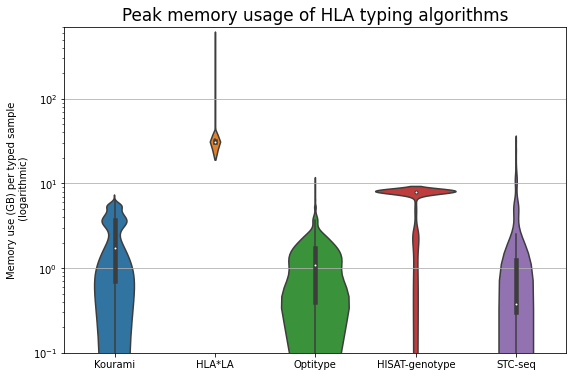

In [5]:
#Make dataframe wideformat
memory_use_wide_df = pd.melt(memory_use_gb_df, var_name='tool', value_name='memory_use_GB')

# load data into a dataframe
fontsize = 10

fig, ax = plt.subplots(figsize=(9,6))
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot('tool', 'memory_use_GB', data=memory_use_wide_df, ax = ax)

plt.yscale('log')
plt.ylabel('Memory use (GB) per typed sample\n (logarithmic)')
plt.xlabel('')
ax.yaxis.grid()

ax.set_ylim(0.1, max(memory_use_gb_df['hla-la'])+100)

ax.set_xticklabels(['Kourami', 'HLA*LA', 'Optitype', 'HISAT-genotype', 'STC-seq'])

plt.rcParams.update({'font.size': 14})
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)


plt.title('Peak memory usage of HLA typing algorithms')

plt.show()

C:\Users\nikol\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


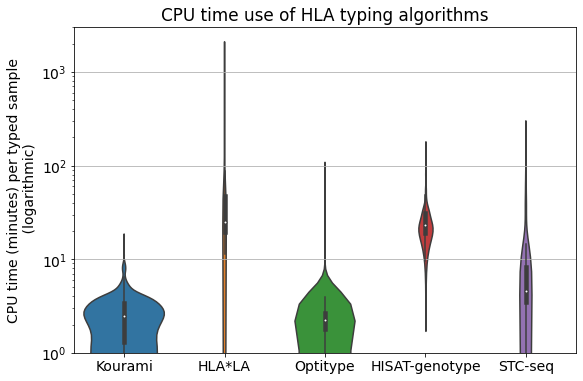

In [6]:
#Make dataframe wideformat
memory_use_wide_df = pd.melt(cpu_time_min_df, var_name='tool', value_name='memory_use_GB')

# load data into a dataframe
fontsize = 10

fig, ax = plt.subplots(figsize=(9,6))
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot('tool', 'memory_use_GB', data=memory_use_wide_df, ax = ax)


plt.ylabel('CPU time (minutes) per typed sample\n (logarithmic)')
plt.xlabel('')
ax.yaxis.grid()

plt.yscale('log')
ax.set_ylim(1, max(cpu_time_min_df['hla-la'])+1000)

ax.set_xticklabels(['Kourami', 'HLA*LA', 'Optitype', 'HISAT-genotype', 'STC-seq'])


plt.rcParams.update({'font.size': 14})
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

plt.title('CPU time use of HLA typing algorithms')

plt.show()

C:\Users\nikol\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


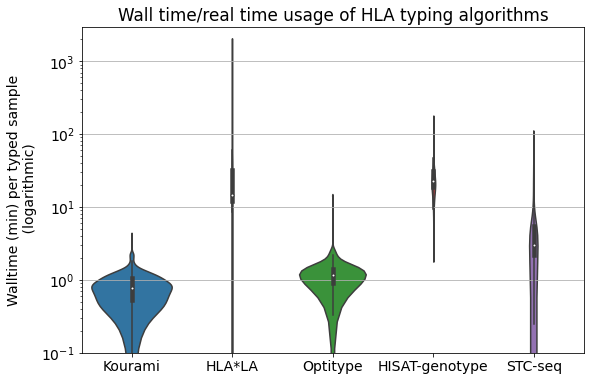

In [7]:
#Make dataframe wideformat
memory_use_wide_df = pd.melt(wall_time_min_df, var_name='tool', value_name='memory_use_GB')

# load data into a dataframe
fontsize = 10

fig, ax = plt.subplots(figsize=(9,6))
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot('tool', 'memory_use_GB', data=memory_use_wide_df, ax = ax)

ax.set_xticklabels(['Kourami', 'HLA*LA', 'Optitype', 'HISAT-genotype', 'STC-seq'])

plt.yscale('log')
plt.ylabel('Walltime (min) per typed sample\n (logarithmic)')
plt.xlabel('')
ax.yaxis.grid()

plt.title('Wall time/real time usage of HLA typing algorithms')

ax.set_ylim(0.1, max(wall_time_min_df['hla-la'])+1000)

plt.show()

# Non log violinplots

C:\Users\nikol\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


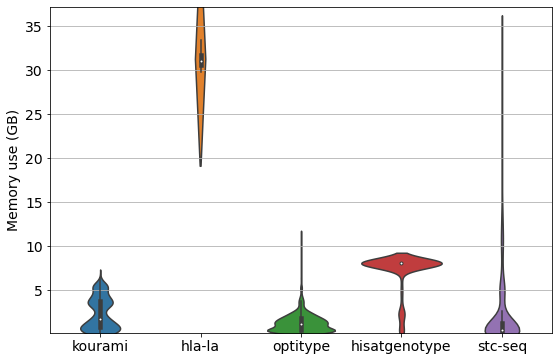

In [8]:
#Make dataframe wideformat
memory_use_wide_df = pd.melt(memory_use_gb_df, var_name='tool', value_name='memory_use_GB')

# load data into a dataframe
fontsize = 10

fig, ax = plt.subplots(figsize=(9,6))
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot('tool', 'memory_use_GB', data=memory_use_wide_df, ax = ax)

#plt.yscale('log')
plt.ylabel('Memory use (GB)')
plt.xlabel('')
ax.yaxis.grid()

ax.set_ylim(0.1, np.mean(memory_use_gb_df['hla-la'])+5)

plt.show()

C:\Users\nikol\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


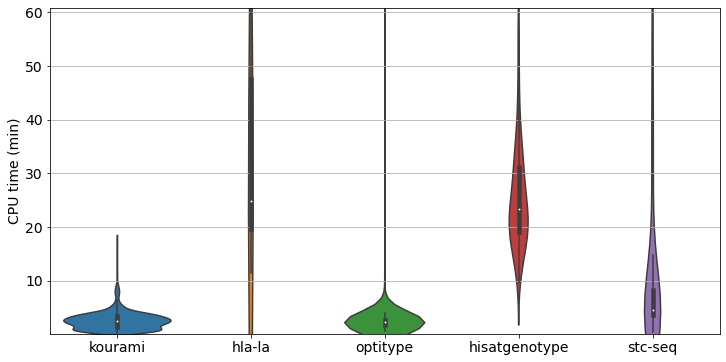

In [9]:
#Make dataframe wideformat
memory_use_wide_df = pd.melt(cpu_time_min_df, var_name='tool', value_name='memory_use_GB')

# load data into a dataframe
fontsize = 10

fig, ax = plt.subplots(figsize=(12,6))
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot('tool', 'memory_use_GB', data=memory_use_wide_df, ax = ax)


plt.ylabel('CPU time (min)')
plt.xlabel('')
ax.yaxis.grid()

#plt.yscale('log')
ax.set_ylim(0.1, np.mean(cpu_time_min_df['hla-la'])+10)

plt.show()

C:\Users\nikol\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


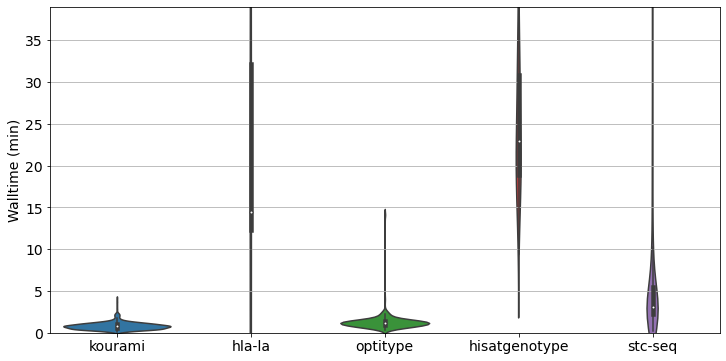

In [10]:
#Make dataframe wideformat
memory_use_wide_df = pd.melt(wall_time_min_df, var_name='tool', value_name='memory_use_GB')

# load data into a dataframe
fontsize = 10

fig, ax = plt.subplots(figsize=(12,6))
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot('tool', 'memory_use_GB', data=memory_use_wide_df, ax = ax)

#plt.yscale('log')
plt.ylabel('Walltime (min)')
plt.xlabel('')
ax.yaxis.grid()

ax.set_ylim(0, np.mean(wall_time_min_df['hla-la']))

plt.show()

# Boxplots

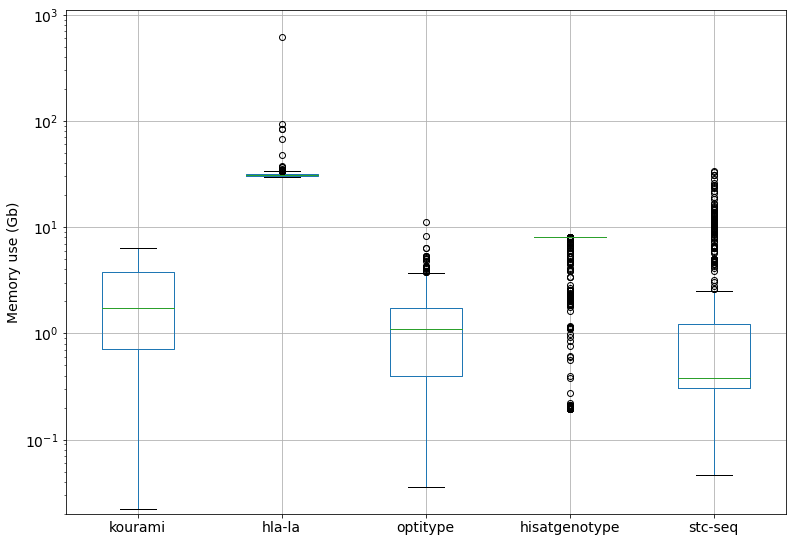

In [11]:
fig = plt.figure(figsize =(10, 7)) 

# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
ax.set_ylim(0.02, max(memory_use_gb_df['hla-la'])+500)

plt.yscale('log')
plt.ylabel('Memory use (Gb)')

memory_use_gb_df.boxplot()

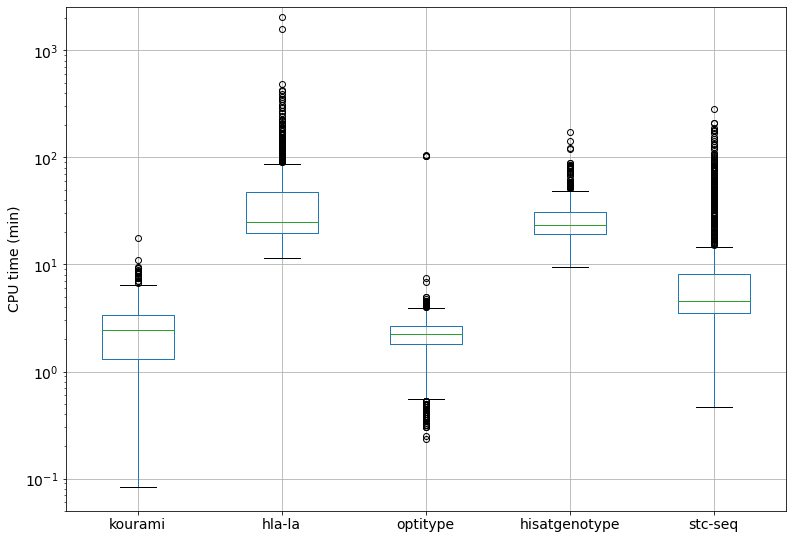

In [12]:
fig = plt.figure(figsize =(10, 7)) 

# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
ax.set_ylim(0.05, max(cpu_time_min_df['hla-la'])+500)

plt.yscale('log')
plt.ylabel('CPU time (min)')

cpu_time_min_df.boxplot()

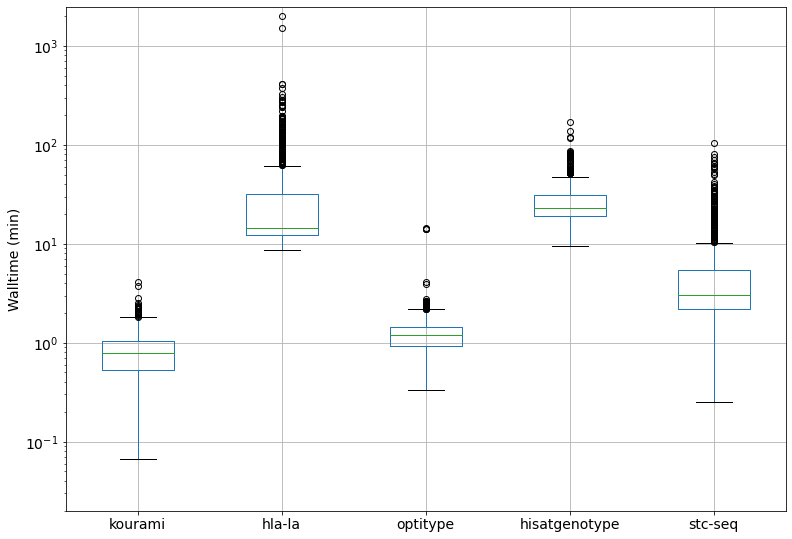

In [13]:
fig = plt.figure(figsize =(10, 7)) 

# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
ax.set_ylim(0.02, max(wall_time_min_df['hla-la'])+500)

plt.yscale('log')
plt.ylabel('Walltime (min)')

wall_time_min_df.boxplot()

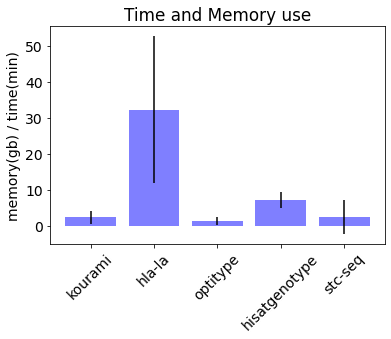

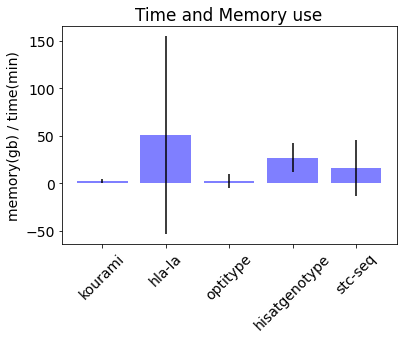

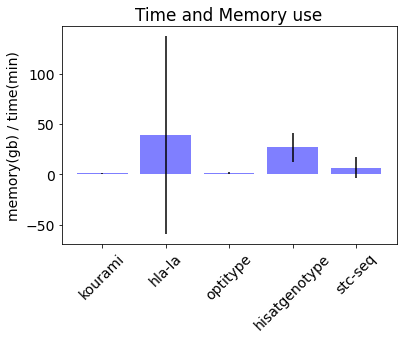

In [14]:
for df in [memory_use_gb_df, cpu_time_min_df, wall_time_min_df]:

    mean_values = df.mean()

    std_values = df.std()

    plt.bar(range(len(df.columns)), mean_values, 
            yerr=std_values, align='center', alpha=0.5, color = '#0000FF')

    plt.xticks(range(len(df.columns)), df.columns, rotation = 45)
    plt.ylabel('memory(gb) / time(min)')
    plt.title('Time and Memory use')
    plt.show()

# Old code

In [15]:
exon_1 = 'AGA GTC TCC TCA GAC GCC GAG ATG CTG GTC ATG GCG CCC CGA ACC GTC CTC CTG CTG CTC TCG GCG GCC CTG GCC CTG ACC GAG ACC TGG GCC G'

In [16]:
len(exon_1)

125

In [17]:
len('ATG CTGGTCATGGCGCCCCGAACCGTCCTCCTGCTGCTCTCGGCGGCCCTGGCCCTGACCGAGACCTGGGCCG')

74

In [18]:
cpu_time_min_dict

{'kourami': [3.5833333333333335,
  1.8833333333333333,
  2.533333333333333,
  2.1,
  3.183333333333333,
  2.6833333333333336,
  3.55,
  2.5833333333333335,
  2.55,
  2.6166666666666667,
  0.4,
  3.1333333333333333,
  2.6333333333333333,
  2.7333333333333334,
  2.7666666666666666,
  0.1,
  1.3666666666666667,
  0.6833333333333333,
  0.9,
  2.533333333333333,
  3.45,
  0.15,
  3.3666666666666667,
  3.7666666666666666,
  3.7333333333333334,
  1.6666666666666665,
  1.4666666666666668,
  4.15,
  1.5333333333333332,
  0.6333333333333333,
  3.8,
  2.3666666666666667,
  1.5666666666666667,
  2.4333333333333336,
  1.6,
  0.95,
  1.3666666666666667,
  2.716666666666667,
  2.2666666666666666,
  3.4833333333333334,
  2.8166666666666664,
  3.65,
  1.6666666666666665,
  2.1,
  0.8333333333333334,
  2.5666666666666664,
  1.2,
  4.733333333333333,
  4.083333333333333,
  3.35,
  0.18333333333333332,
  2.0166666666666666,
  2.85,
  2.1666666666666665,
  1.3333333333333333,
  2.8333333333333335,
  0.15,


In [19]:
np.sum(cpu_time_min_dict['kourami'])

2119.866666666667

In [20]:
total_cpu_time = 0
for tool in cpu_time_min_dict:
    total_cpu_time += np.sum(cpu_time_min_dict[tool])

In [21]:
total_cpu_time / 60

1376.7097222222224

In [22]:
total_cpu_time

82602.58333333334